# Find the true optimization implemented in EH-BLAS / emath

In [1]:
import sys
sys.path.insert(0, "/Users/ethanhersch/Documents/Documents/exploration/EH-BLAS/src")

import emath
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [2]:
import sys
sys.executable

'/Users/ethanhersch/anaconda3/bin/python'

In [3]:
A = emath.Matrix([[1]])
B = emath.Matrix([[2]])

A.compare_times(B)

(0.003, 0.002, 0.001)

In [3]:
A@B

---
2.000000
---

In [19]:
A = emath.Matrix([[1]])
B = emath.Matrix([[2]])
A.compare_times(B)

AttributeError: 'emath.Matrix' object has no attribute 'compare_times'

In [12]:
A = np.random.standard_normal(size=(10, 10))
B = np.random.standard_normal(size=(10, 10))
A = emath.Matrix(A)
B = emath.Matrix(B)
A.compare_times(B)

AttributeError: 'emath.Matrix' object has no attribute 'compare_times'

In [4]:
def get_data(k, high, samples):
  blocked_times = []
  parallel_times = []
  naive_times = []
  np_times = []
  xs = [k * i for i in range(1, high + 1)]
  for _ in range(samples):
    cur_blocked = []
    cur_parallel = []
    cur_naive = []
    cur_np = []
    for i in range(1, high+1):
      N = k * i
      A = np.random.standard_normal(size=(N, N))
      B = np.random.standard_normal(size=(N, N))
      t0 = time()
      A @ B
      t1 = time()
      A = emath.Matrix(A)
      B = emath.Matrix(B)

      (naive_time, parallel_time, blocked_time) = A.compare_times(B)

      cur_naive += [naive_time]
      cur_parallel += [parallel_time]
      cur_blocked += [blocked_time]
      cur_np += [t1 - t0]
      
    naive_times += [cur_naive]
    parallel_times += [cur_parallel]
    blocked_times += [cur_blocked]
    np_times += [cur_np]
  return xs, naive_times, parallel_times, blocked_times, np_times

In [ ]:
xs, naive_times, parallel_times, blocked_times, np_times = get_data(500, 20, 3)

In [57]:
new_blocked_times = np.mean(blocked_times, axis = 0)
new_parallel_times = np.mean(parallel_times, axis = 0)
new_naive_times = np.mean(naive_times, axis = 0)
new_np_times = np.mean(np_times, axis=0)

In [58]:
new_blocked_times

array([   2.5168,   16.56  ,   37.433 ,   88.4738,  215.5046,  305.7916,
        478.6208,  716.456 , 1011.0048, 1596.0414])

In [59]:
def plot_complexity(xs, naive_times, parallel_times, blocked_times, np_time):
    xs = np.array(xs)

    # linear regression in log-log space
    log_x = np.log(xs)
    log_t_blocked = np.log(blocked_times)
    slope_blocked, intercept_blocked = np.polyfit(log_x, log_t_blocked, 1)

    log_t_naive = np.log(naive_times)
    slope_naive, intercept_naive = np.polyfit(log_x, log_t_naive, 1)

    log_t_parallel = np.log(parallel_times)
    slope_parallel, intercept_parallel = np.polyfit(log_x, log_t_parallel, 1)

    log_t_np= np.log(np_time)
    slope_np, intercept_np = np.polyfit(log_x, log_t_np, 1)

    plt.plot(xs, blocked_times, marker='o', color = 'red', label = f'Blocked: O(n^{slope_blocked:.2f})')
    plt.plot(xs, naive_times, marker='o', color = 'blue', label = f'Naive: O(n^{slope_naive:.2f})')
    #plt.plot(xs, parallel_times, marker='o', color = 'pink', label = f'Parallel: O(n^{slope_parallel:.2f})')
    #plt.plot(xs, np_time, marker='o', color = 'green', label = f'NumPy: O(n^{slope_np:.2f})')
    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel("n")
    plt.ylabel("Time")
    plt.title(f"Empirical complexity of blocked vs naive")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.show()

    return slope_blocked, slope_naive


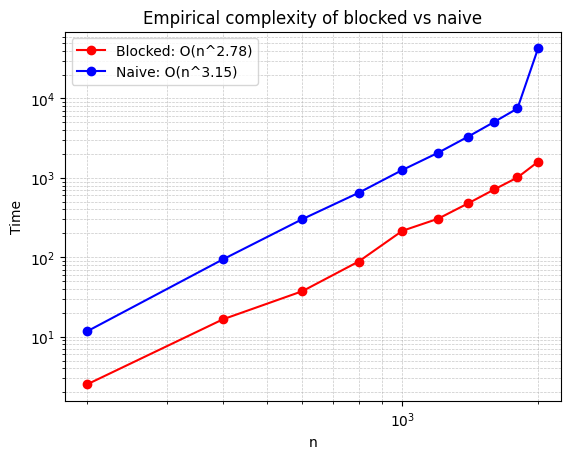

(2.776553819758335, 3.148084667005164)

In [60]:
plot_complexity(xs, new_naive_times, new_parallel_times, new_blocked_times, new_np_times)

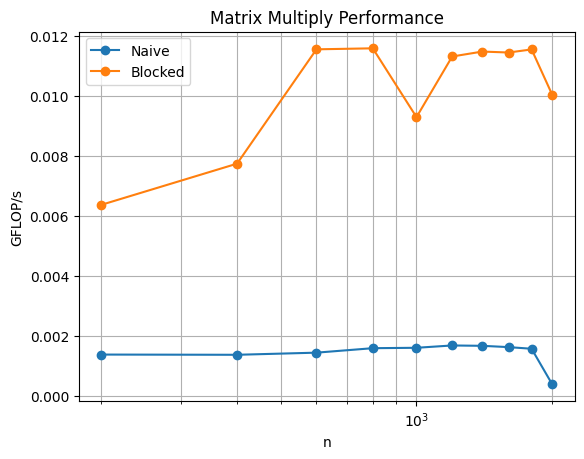

In [61]:
def plot_gflops(xs, times, label):
    xs = np.array(xs)
    times = np.array(times)
    gflops = (2 * xs**3) / times / 1e9
    plt.plot(xs, gflops, marker='o', label=label)

plt.figure()
plot_gflops(xs, new_naive_times, "Naive")
plot_gflops(xs, new_blocked_times, "Blocked")
plt.xscale("log")
plt.xlabel("n")
plt.ylabel("GFLOP/s")
plt.title("Matrix Multiply Performance")
plt.legend()
plt.grid(True, which="both")
plt.show()

In [8]:
def time_differences(k, high, samples):
  blocked_times = []
  naive_times = []
  xs = [k * i for i in range(1, high + 1)]
  for _ in range(samples):
    cur_blocked = []
    cur_naive = []
    for i in range(1, high+1):
      N = k * i
      A = np.random.standard_normal(size=(N, N))
      B = np.random.standard_normal(size=(N, N))
      A = emath.Matrix(A)
      B = emath.Matrix(B)

      (naive_time, parallel_time, blocked_time) = A.compare_times(B)

      cur_naive += [naive_time]
      cur_blocked += [blocked_time]
      
    naive_times += [cur_naive]
    blocked_times += [cur_blocked]
  return xs, naive_times, blocked_times

In [ ]:
xs, naive_times, blocked_times = time_differences(1000, 10, 5)

In [17]:
new_blocked_times = np.mean(blocked_times, axis = 0)
new_naive_times = np.mean(naive_times, axis = 0)

In [25]:
new_blocked_times

array([  214.452,  1602.454,  4728.332, 11274.194, 25753.906])

In [26]:
new_naive_times

array([  1155.039,  47227.016,  49322.402, 164956.313, 758510.381])

In [27]:
def bar_plot(xs, blocked_times, naive_times):
    xs = np.array(xs)
    idx = np.arange(len(xs))   # 0,1,2,3,...
    width = 0.35

    plt.bar(idx - width/2, naive_times, width, label='Naive')
    plt.bar(idx + width/2, blocked_times, width, label='Blocked')

    plt.xlabel("Matrix size n")
    plt.ylabel("Time (miliseconds)")
    plt.title("Naive vs Blocked Matrix Multiplication")

    plt.xticks(idx, xs)        # show actual matrix sizes
    plt.legend()
    plt.tight_layout()
    plt.show()

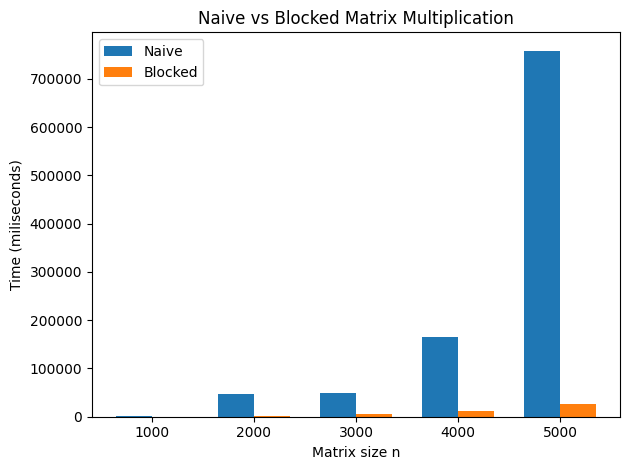

In [28]:
bar_plot(xs, new_blocked_times, new_naive_times)

In [11]:
A = np.random.standard_normal(size = (10,10))
B = np.random.standard_normal(size = (10,10))
C = A @ B

mat_A = emath.Matrix(A)
mat_B = emath.Matrix(B)
mat_c = mat_A @ mat_B


In [12]:
ref_c = emath.Matrix(C)
ref_c == mat_c

True

In [19]:
A = np.random.standard_normal(size = (500,500))
B = np.random.standard_normal(size = (500,500))
C = A @ B

mat_A = emath.Matrix(A)
mat_B = emath.Matrix(B)
mat_A.compare_times(mat_B)

(216.805, 27.398, 23.001)